---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

In [1]:
from IPython.display import Image
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

def imageNcaption(filename, caption):
    display(Image(filename=filename))
    print(caption)

# Tarefa 6 - Transformação de intensidade: alargamento de contraste

Nesta tarefa será estudado o efeito que a alteração de brilho, contraste e equalização do histograma tem em uma imagem médica. Para essa tarefa será utilizada a seguinte imagem, seguida de seu respectivo histograma calculado pela função *histogram* criada neste ambiente com o próposito de receber uma imagem, retornar seu histograma e realizar a apresentação gráfica da imagem utilizada e seu histograma.

Segue abaixo o carregamento e apresentação da imagem que será utilizada durante a tarefa:

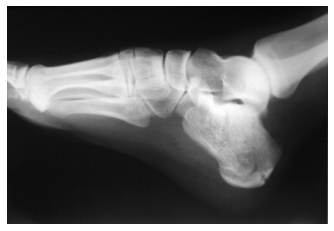

In [2]:
img = image.imread('RaiosX 1_1.jpg')
plt.imshow(img, cmap='gray')
plt.grid(False)
plt.axis(False);

## Transformações lineares

Nesta seção será trabalhado o alargamento de contraste por uma transformação linear por faixa das intensidades de pixels. A função abaixo permite construir uma função linear por partes que aplica diferentes transformações dependendo da intensidade do pixel.

In [3]:
def linear_transform(range_, y_end, y_start, x_end, x_start):
    a = (y_end-y_start)/(x_end-x_start) # derivative
    b = y_start - a*x_start
    transform_ = a*range_ + b
    return transform_

Para termos de ilustração serão utilizadas 3 faixas:

- De $r_0$ a $r_1$ de intensidade dos pixels;
- De $r_1+1$ a $r_2$ de intensidade dos pixels;
- De $r_2+1$ a $r_3$ de intensidade dos pixels;

Sendo os valores limítrofes $r_0=0$ e $r_3=255$.

Cada uma dessas faixas mapeará os pixels para valores nas respectivas faixas:

- De $s_0$ a $s_1$ de intensidade dos pixels;
- De $s_1+1$ a $s_2$ de intensidade dos pixels;
- De $s_2+1$ a $s_3$ de intensidade dos pixels;

Também com $s_0=0$ e $s_3=255$.

Abaixo vide os resultados padrões, consistindo na construção da função de transformação por partes de acordo com os coeficientes oferecidos.


In [4]:
r0, s0 = 0, 0
r1, s1 = 70, 86
r2, s2 = 120, 190
r3, s3 = 255, 255

trans_ = np.array([], dtype=np.uint8)

trans1 = linear_transform(np.arange(r0,r1+1, dtype=np.uint8), s1, s0, r1, r0)
trans2 = linear_transform(np.arange(r1+1,r2+1, dtype=np.uint8), s2, s1, r2, r1)
trans3 = linear_transform(np.arange(r2+1,r3+1, dtype=np.uint8), s3, s2, r3, r2)

trans_ = np.concatenate((trans1, trans2, trans3))
range_ = np.arange(0,256)

Com a função transformação criada, basta aplicar a cada pixel da imagem e observar os resultados com auxílio da função abaixo:

In [5]:
def apply_transform(img, trans_, range_):
    fig = plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,1,2)
    axes = [ax1, ax2, ax3]

    img_new = trans_[img]
        
    ax1.imshow(img, cmap='gray')
    ax2.imshow(img_new, cmap='gray')
    ax3.plot(range_, trans_)


    ax1.set_title('Original image')
    ax2.set_title('Transformed image')
    ax3.set_title('Transform function')

    ax3.set_xlabel('Original image pixels value')
    ax3.set_ylabel('Transformed image pixels value')

    ax1.grid(False)
    ax1.axis(False)

    ax2.grid(False)
    ax2.axis(False)

    return img_new

Assim:

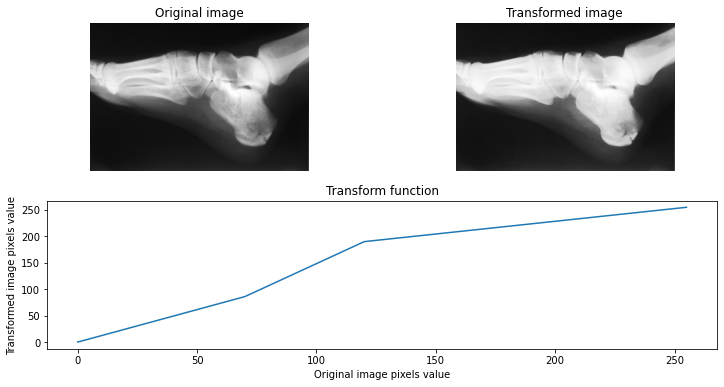

In [6]:
img_new = apply_transform(img, trans_, range_)

Na tarefa solicita-se que, inicialmente modifque-se os parâmetros $r_1$ e $r_2$ e em um segundo momento modifique-se $s_1$ e $s_2$. Para o primeiro caso tem-se:

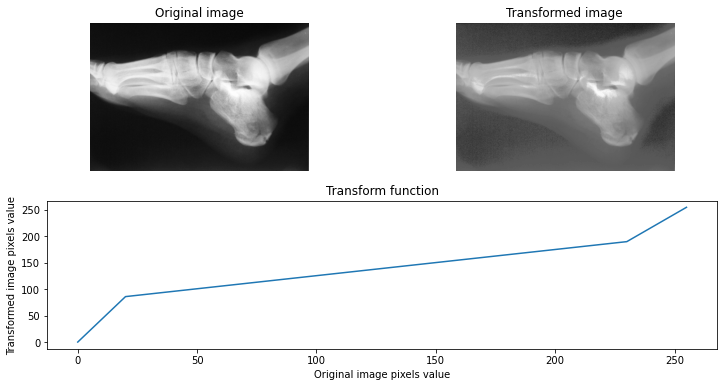

In [7]:
r0, s0 = 0, 0
r1, s1 = 20, 86
r2, s2 = 230, 190
r3, s3 = 255, 255

trans_ = np.array([], dtype=np.uint8)

trans1 = linear_transform(np.arange(r0,r1+1, dtype=np.uint8), s1, s0, r1, r0)
trans2 = linear_transform(np.arange(r1+1,r2+1, dtype=np.uint8), s2, s1, r2, r1)
trans3 = linear_transform(np.arange(r2+1,r3+1, dtype=np.uint8), s3, s2, r3, r2)

trans_ = np.concatenate((trans1, trans2, trans3))
range_ = np.arange(0,256)

img_new = apply_transform(img, trans_, range_)

Neste caso optou-se por uma transformação suave em que pixels de valores intermediários possuem leve alteração, enquanto que os pixels de valores de borda são transformados para valores maiores que eles a uma maior taxa. O efeito ocasionado na imagem foi um aumento no brilho devido ao incremento nos pixels de baixo valor.

Para o segundo caso solicitado, tem-se

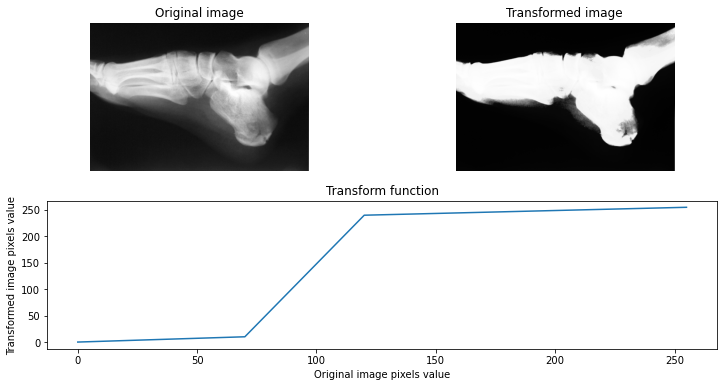

In [8]:
r0, s0 = 0, 0
r1, s1 = 70, 10
r2, s2 = 120, 240
r3, s3 = 255, 255

trans_ = np.array([], dtype=np.uint8)

trans1 = linear_transform(np.arange(r0,r1+1, dtype=np.uint8), s1, s0, r1, r0)
trans2 = linear_transform(np.arange(r1+1,r2+1, dtype=np.uint8), s2, s1, r2, r1)
trans3 = linear_transform(np.arange(r2+1,r3+1, dtype=np.uint8), s3, s2, r3, r2)

trans_ = np.concatenate((trans1, trans2, trans3))
range_ = np.arange(0,256)

img_new = apply_transform(img, trans_, range_)

Neste outro caso foi alterado como pixels de valores semi intermediários sofrem grande variação considerando pouca variação, enquanto que pixels fora desse intervalo quase que são forçados para o mesmo valor. Esse comportamento extremo casuou quase que uma binarização da imagem, principalmente para valores limítrofes.

## Transformações de potência

Nesta seção será trabalhada um tipo diferente de transformação e que variação em forma de potência (não mais linear). Sua equação obedece:

\begin{align}
s = c r^{\gamma}
\end{align}

Ao alterar o fator gamma permite-se obter diferentes níveis de re-significância aos pixels. Para testar serão utilizados três valores de gamma. Primeiro definirá uma função para aplicar a transformação de potência, tal como para o caso linear.

In [9]:
def power_transform(range_, gamma_, constant_):
    return constant_ * (255/(255**gamma_)) * (range_**gamma_)

Assim permitirá traçar vários casos:

Text(0.5, 1.0, 'Power transform function for various gamma factors')

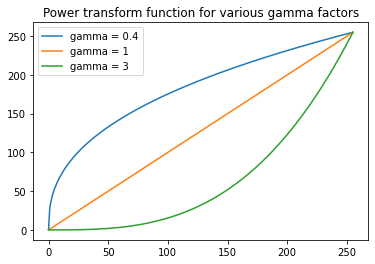

In [10]:
range_ = np.arange(0,256)
gamma_list = [0.4, 1, 3]

trans_ = np.zeros((len(range_), len(gamma_list)))

for i in range(len(gamma_list)): trans_[:,i] = power_transform(range_, gamma_list[i], constant_=1)

fig, ax = plt.subplots()

ax.plot(trans_[:,0], label='gamma = '+ str(gamma_list[0]))
ax.plot(trans_[:,1], label='gamma = '+ str(gamma_list[1]))
ax.plot(trans_[:,2], label='gamma = '+ str(gamma_list[2]))
ax.legend()
ax.set_title('Power transform function for various gamma factors')

Observa-se que de acordo com que o gamma diminui, um nível de significância maior é atribuído aos pixels de menor intensidade. Porém, apesar disso, todos tende a convergir a uma mesmo valor. 

Agora será mostrado o efeito dessas transformações nas imagens:

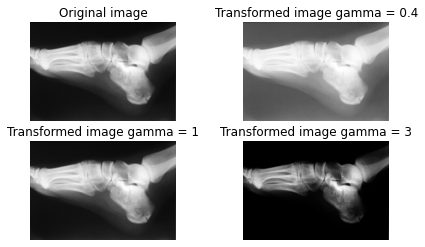

In [11]:
fig, ax = plt.subplots(figsize=(7, 4))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3, ax4]

ax1.imshow(img, cmap='gray')
ax2.imshow(trans_[img,0], cmap='gray')
ax3.imshow(trans_[img,1], cmap='gray')
ax4.imshow(trans_[img,2], cmap='gray')
    
ax1.set_title('Original image')
ax2.set_title('Transformed image ' + 'gamma = '+ str(gamma_list[0]))
ax3.set_title('Transformed image ' + 'gamma = '+ str(gamma_list[1]))
ax4.set_title('Transformed image ' + 'gamma = '+ str(gamma_list[2]))

for ax in axes: 
    ax.grid(False)
    ax.axis(False)

Nota-se que o resultado de um baixo gamma se reflete no brilho da imagem, enquanto que um alto valor apesar de reduzir bastante o brilho, possui um aprimoramento no contraste.

## Transformações logarítmica

Para o mesmo caso discutido anteriormente, esta seção se propõe a apresentar uma transformação logarítmica na forma:

\begin{align}
s = c log(1+r)
\end{align}

A função de transformação também foi implementada por meio de uma função:

In [13]:
def log_transform(range_, factor_):
    return (255/(np.exp(255/factor_)-1)) * (np.exp(range_/factor_)-1) 

Da mesma forma que a seção anterior, será traçada diversas curvas para fatores diferentes para que possa ser identificada as variações no modelo da transformação.

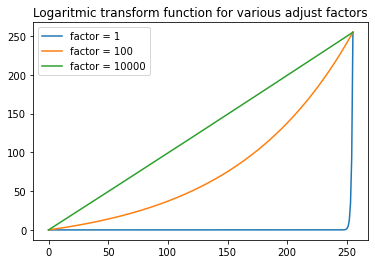

In [14]:
range_ = np.arange(0,256)
factor_list = [1, 100, 10000]

trans_ = np.zeros((len(range_), len(factor_list)))

for i in range(len(factor_list)): trans_[:,i] = log_transform(range_, factor_list[i])

fig, ax = plt.subplots()

ax.plot(trans_[:,0], label='factor = '+ str(factor_list[0]))
ax.plot(trans_[:,1], label='factor = '+ str(factor_list[1]))
ax.plot(trans_[:,2], label='factor = '+ str(factor_list[2]))
ax.set_title('Logaritmic transform function for various adjust factors')
ax.legend()


Os efeitos da função exponencial só bem variáveis com a alteração brusca dos fatores de ajuste. Quando pequenos, este mapeiam os valores de intensidade dos pixels em uma range muito baixo, seja com pequenas variações no pixel original representando bruscas variações no pixel transformado ou vice-versa. Porém ao aumentar o fator em uma escala exponencial tende-se a obter curvas côncavas que seguem um comportamento crescente e que aos poucos tendem a se transformar em uma reta linear.

Nas imagens esses efeitos se refletem como abaixo:

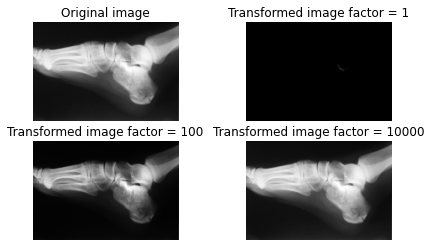

In [15]:
fig, ax = plt.subplots(figsize=(7, 4))

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
axes = [ax1, ax2, ax3, ax4]

ax1.imshow(img, cmap='gray')
ax2.imshow(trans_[img,0], cmap='gray')
ax3.imshow(trans_[img,1], cmap='gray')
ax4.imshow(trans_[img,2], cmap='gray')
    
ax1.set_title('Original image')
ax2.set_title('Transformed image ' + 'factor = '+ str(factor_list[0]))
ax3.set_title('Transformed image ' + 'factor = '+ str(factor_list[1]))
ax4.set_title('Transformed image ' + 'factor = '+ str(factor_list[2]))

for ax in axes: 
    ax.grid(False)
    ax.axis(False)

Como se esperado, um baixo factor possui variações muito bruscas nos pixels da imagem e que, pela concavidade da função permite que os pixels escuros sejam priorizados. Um fator intermediário garante um bom ajuste no contraste, enquanto que ao aumentar o fator este tende a ser uma transformação linear com um ajuste d ebrilho quase nulo, mantendo apenas o ajuste de contraste.